# Proyecto: Análisis del mercado inmobiliario de la Ciudad de Buenos Aires

Mentor: Javier Lezama.

javitolez@gmail.com

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal www.Properati.com.ar.

# El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 

#Los atributos

A continuación vamos a describir los atributos que consideramos en esta muestra:
* id: id de la propiedad
* created_on: fecha en la que la propiedad ingresó al sitio
* operation: alquiler (rent) o venta (sell)
* property_type: tipo de propiedad (casa, departamento, ph, etcétera)
* place_with_parent_names: nombre del lugar donde se encuentra la propiedad según el publicador
* lat-lon: coordenadas concatenadas
* lat: latitud
* lon: longitud
* price: precio en la moneda especificada en currency
* currency: divisa en la que está expresada la publicación
* price_aprox_usd: precio aproximado en dólares estadounidenses
* surface_total_in_m2: superficie total (en metros cuadrados)
* surface_covered_in_m2: superficie cubierta (en metros cuadrados)
* price_usd_per_m2: precio por metro cuadrado en dólares (precio dólares / superficie)
* floor: número de piso (si corresponde)
* rooms: cantidad de ambientes
* expenses: expensas (si corresponde)
* barrio: barrio según cartografía oficial
* properati_url: url de la publicación en Properati

Objetivos del practico aprendizaje automático:

El objetivo de este práctico es trabajar con el mismo dateset trabajado en el práctico dos, trabajar con diferentes modelos de regresión no trabajados antes y lo visto en el módulo de clases.
Para eso trabajaremos con el dataset resultante del practico dos para armar diferentes modelos para predecir el precio de las propiedades en dólares.

# Manos a la obra


Partiremos con el dataset resultante del práctico dos.

In [116]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#from ml.visualization import plot_confusion_matrix, plot_learning_curve
from sklearn.datasets import load_wine
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(1234) # Para mayor determinismo



In [2]:
df_prop = pd.read_csv('df_bin.csv')
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7716 entries, 0 to 7715
Data columns (total 79 columns):
Unnamed: 0                                                                       7716 non-null int64
created_on                                                                       7716 non-null object
operation                                                                        7716 non-null object
property_type                                                                    7716 non-null int64
place_with_parent_names                                                          7716 non-null object
lat-lon                                                                          7716 non-null object
lat                                                                              7716 non-null float64
lon                                                                              7716 non-null float64
price_aprox_usd                                                              

In [3]:
df_prop.head(4)

,Unnamed: 0,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,...,place_with_parent_names_|Argentina|Capital Federal|Villa General Mitre|,place_with_parent_names_|Argentina|Capital Federal|Villa Lugano|,place_with_parent_names_|Argentina|Capital Federal|Villa Luro|,place_with_parent_names_|Argentina|Capital Federal|Villa Ortuzar|,place_with_parent_names_|Argentina|Capital Federal|Villa Pueyrredón|,place_with_parent_names_|Argentina|Capital Federal|Villa Real|,place_with_parent_names_|Argentina|Capital Federal|Villa Santa Rita|,place_with_parent_names_|Argentina|Capital Federal|Villa Urquiza|,place_with_parent_names_|Argentina|Capital Federal|Villa del Parque|,price_m2
0,18,2017-08-29,sell,1,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,...,0,0,0,0,0,0,0,0,0,2615.384615
1,20,2017-08-29,sell,1,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,...,0,0,0,0,0,0,0,0,0,2571.428571
2,22,2017-08-30,sell,2,|Argentina|Capital Federal|Palermo|Palermo Hol...,"-34.5793535,-58.4364489",-34.579353,-58.436449,1200000.0,532.0,...,0,0,0,0,0,0,0,0,0,2255.639098
3,25,2017-08-30,sell,0,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.0,72.0,...,0,0,0,0,0,0,0,0,0,3041.666667


In [4]:
df_prop = df_prop[['surface_total_in_m2','barrio_cod','property_type','rooms','surface_covered_in_m2','price_aprox_usd']]
df_prop.head()

,surface_total_in_m2,barrio_cod,property_type,rooms,surface_covered_in_m2,price_aprox_usd
0,130.0,20,1,4.000000,120.0,340000.00
1,70.0,20,1,2.422019,70.0,180000.00
2,532.0,20,2,6.000000,334.0,1200000.00
3,72.0,20,0,3.000000,72.0,219000.00
4,40.0,20,1,1.000000,36.0,119124.77


# Ejercicio 1: División de datos en conjuntos de entrenamiento y evaluación.

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o training) y evaluación (o test).

Se separa el set de datos tomando el 80% para entrenamiento y el 20% para validación

In [5]:
#x es el conjunto de features
X = df_prop.drop('price_aprox_usd', axis=1)

#y es la columna target que se desea predecir
y = df_prop.price_aprox_usd

from sklearn.model_selection import train_test_split
#Random state sirve para sembrar una "Seed" de como se distribuyen los datos para el algoritmo
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

#x_train tiene el 80% de los features (x)
#x_valid tiene el 20% de los features (xx)
#y_train tiene el 80% de la columna de target (y)
#y_valid tiene el 20% de la columna de target (yy)

In [6]:
X.head(4)

,surface_total_in_m2,barrio_cod,property_type,rooms,surface_covered_in_m2
0,130.0,20,1,4.000000,120.0
1,70.0,20,1,2.422019,70.0
2,532.0,20,2,6.000000,334.0
3,72.0,20,0,3.000000,72.0


In [6]:
y_train.head(4)

5433     93000.0
755     126000.0
291      87000.0
5890    349250.0
Name: price_aprox_usd, dtype: float64

# Ejercicio 2: Árboles de decisión.

Entrenar un arbol de decisión de regresión para predecir el precio de las propiedades en dolares, variando sus hiperparametros tales como la profundidad, función de coste, etc.

In [7]:
X_train.head(4)

,surface_total_in_m2,barrio_cod,property_type,rooms,surface_covered_in_m2
5433,31.0,47,1,1.0,29.0
755,40.0,20,1,2.0,40.0
291,30.0,20,1,2.0,30.0
5890,157.0,1,0,4.0,107.0


In [117]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

- Se plantea a mano la prueba de parámetros para analizar impacto en la función de costo

In [49]:
rmse_dt_reg = {'RMSE': [], 'Splitter': [], 'Max_depth':[],'Min_samples_leaf':[],'Min_samples_split':[]}
df_rmse = pd.DataFrame(data=rmse_dt_reg)
df_rmse

,RMSE,Splitter,Max_depth,Min_samples_leaf,Min_samples_split


In [50]:
def insert_row(dict_to_apped):
    return df_rmse.append(dict_to_apped, ignore_index=True)

In [95]:
splitter = 'random'
max_depth = 35
min_samples_leaf = 4
min_samples_split = 2


dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=max_depth, min_samples_leaf=min_samples_leaf,
           min_samples_split=min_samples_split, random_state=42, splitter=splitter)

dt_regressor.fit(X_train, y_train)

y_dt_pred = dt_regressor.predict(X_train)

rms = mean_squared_error(y_train,y_dt_pred)
param_dict = rmse_dt_reg = {'RMSE': rms, 'Splitter':splitter, 'Max_depth':max_depth,'Min_samples_leaf':min_samples_leaf,'Min_samples_split':min_samples_split}
param_dict

{'RMSE': 1340883101.1200995,
 'Splitter': 'random',
 'Max_depth': 35,
 'Min_samples_leaf': 4,
 'Min_samples_split': 2}

In [110]:
#df_rmse = insert_row(param_dict)
df_rmse

,RMSE,Splitter,Max_depth,Min_samples_leaf,Min_samples_split
0,7.773728e+08,best,10.0,4.0,2.0
1,7.263828e+08,best,11.0,4.0,2.0
2,6.835591e+08,best,12.0,4.0,2.0
3,6.587420e+08,best,13.0,4.0,2.0
4,6.461303e+08,best,14.0,4.0,2.0
5,6.325218e+08,best,20.0,4.0,2.0
6,6.326457e+08,best,30.0,4.0,2.0
7,6.326457e+08,best,35.0,4.0,2.0
8,8.470345e+08,best,10.0,5.0,2.0
9,1.006202e+09,best,10.0,6.0,2.0


Se grafica la variación de la función de costo agrupando por el parámetro "Splitter":

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, 'RMSE vs Max_Depth')

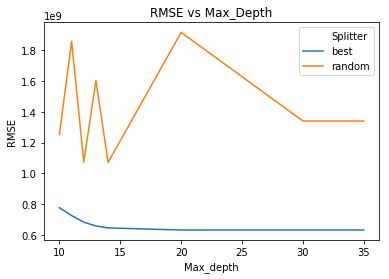

In [126]:
df_rmse_graf = df_rmse[df_rmse.Min_samples_leaf== 4]
df_rmse_graf = df_rmse_graf[df_rmse.Min_samples_split==2]

grafo_rmse_dt = df_rmse_graf[['RMSE','Splitter','Max_depth']] 

sns.lineplot(x = 'Max_depth', y = 'RMSE',hue='Splitter', data=grafo_rmse_dt, )
plt.title("RMSE vs Max_Depth")

Se puede ver en el gráfico como con el splitter = 'random', el RMSE es muy variable entre disintos valores de profundidad. En cambio, cuando el parámetro splitter = 'best' se puede ver como se reduce el RMSE a medida que se aumenta la profundidad del árbol.

In [128]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

Se plantea el modelo del decision tree regressor aplicando GSearch CV para algunos de sus parámetros.

In [133]:
criterion = ['mse','mae','friedman_mse']
splitter = ['best','random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

random_grid_dtr = {'criterion': criterion,
               'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


dtr=DecisionTreeRegressor(random_state=42)

dtr_random = GridSearchCV(dtr, 
                          random_grid_dtr, 
                          cv = 3,
                          verbose=3,
                          n_jobs =2)

# Fit the random search model
dtr_random.fit(X_train, y_train)

  
print("Mejor conjunto de parámetros:")
print(dtr_random.best_params_, end="\n\n")
    
print("Mejor Estimador:")
print(dtr_random.best_estimator_, end="\n\n")
    
print("Mejor RMSE Score:")
print( mean_squared_error(y_train,dtr_random.predict(X_train)), end="\n\n")
print("Mejor R2 Score:")
print(r2_score(y_train,dtr_random.predict(X_train)), end="\n\n")




Fitting 3 folds for each of 2376 candidates, totalling 7128 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 780 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 2715 tasks      | elapsed:   40.4s
[Parallel(n_jobs=2)]: Done 3035 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 3483 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 4059 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 4763 tasks      | elapsed:  3.5min


Mejor conjunto de parámetros:
{'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}

Mejor Estimador:
DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Mejor RMSE Score:
777372768.9117999

Mejor R2 Score:
0.9776252732071621



[Parallel(n_jobs=2)]: Done 7125 out of 7128 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=2)]: Done 7128 out of 7128 | elapsed:  3.7min finished


-- 

No incluiría esta parte de abajo hasta el paso de los KNN
---------------

In [10]:
from sklearn.metrics import r2_score
r2_score(y_train,dtr_random.predict(X_train))


0.9776252732071621

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


print("Mejor conjunto de parámetros:")
print(rf_random.best_params_, end="\n\n")
    
print("Mejor Estimador:")
print(rf_random.best_estimator_, end="\n\n")
    
print("Mejor Score:")
print(rf_random.best_score_, end="\n\n")
print(r2_score(y_train,rf_random.predict(X_train)), end="\n\n")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.7min finished


KeyboardInterrupt: 

In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Minimum number of samples required to split a node
max_samples = [1,2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid_br = {'n_estimators': n_estimators,
               'max_samples': max_samples,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
br = BaggingRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid_br, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(X_train, y_train)


print("Mejor conjunto de parámetros:")
print(br_random.best_params_, end="\n\n")
    
print("Mejor Estimador:")
print(br_random.best_estimator_, end="\n\n")
    
print("Mejor Score:")
print(br_random.best_score_, end="\n\n")
print(r2_score(y_train,br_random.predict(X_train)), end="\n\n")

C:\Users\maria.navarro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s


Mejor conjunto de parámetros:
{'n_estimators': 52, 'max_samples': 10, 'bootstrap': True}

Mejor Estimador:
BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=10, n_estimators=52, n_jobs=None,
                 oob_score=False, random_state=42, verbose=0, warm_start=False)

Mejor Score:
0.6658172322131308

0.612024925373515



[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   10.6s finished


In [43]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
criterion = ['mse','mae','friedman_mse']
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid_etr = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
etr = ExtraTreesRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
etr_random = RandomizedSearchCV(estimator = etr, param_distributions = random_grid_etr, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
etr_random.fit(X_train, y_train)


print("Mejor conjunto de parámetros:")
print(etr_random.best_params_, end="\n\n")
    
print("Mejor Estimador:")
print(etr_random.best_estimator_, end="\n\n")
    
print("Mejor Score:")
print(etr_random.best_score_, end="\n\n")
print(r2_score(y_train,etr_random.predict(X_train)), end="\n\n")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 63.0min finished


Mejor conjunto de parámetros:
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 110, 'criterion': 'mse', 'bootstrap': False}

Mejor Estimador:
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=110,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=5,
                    min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start=False)

Mejor Score:
0.9580962487707595

0.9884365087753302



## Hasta aca dejaría de incluir

# Ejercicio 3: Métricas sobre el conjunto de evaluación.

Análizar como varia la función de coste según se modifican los hiperparametros, i.e, la profundidad de los mismos, etc.

Graficar los valores de la función costo en ambos conjuntos, de entrenamiento (o training) y evaluación (o test).

# Ejercicio 4: Realizar lo mismo ahora con un modelo de KNN

Entrenar un KNN y analizar su comportamiento como en el modelo anterior.

In [12]:
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

%matplotlib inline

Se arma una rutina para probar con distintos valores de K y evaluar el RMSE buscando el mínimo:

In [29]:
valor_rmse = []
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train) 
    pred=model.predict(X_valid)
    error = sqrt(mean_squared_error(y_valid,pred)) 
    valor_rmse.append(error) 
    print('Valor de RMSE para k= ' , K , 'es:', error)

Valor de RMSE para k=  1 es: 40802.79628067377
Valor de RMSE para k=  2 es: 37538.896058284474
Valor de RMSE para k=  3 es: 34722.83113377103
Valor de RMSE para k=  4 es: 34811.23856192836
Valor de RMSE para k=  5 es: 34625.17966323373
Valor de RMSE para k=  6 es: 34397.54856199747
Valor de RMSE para k=  7 es: 34734.53344386213
Valor de RMSE para k=  8 es: 35489.21244499648
Valor de RMSE para k=  9 es: 36065.1238487866
Valor de RMSE para k=  10 es: 36468.943788047436
Valor de RMSE para k=  11 es: 36436.96277333004
Valor de RMSE para k=  12 es: 36841.492934483715
Valor de RMSE para k=  13 es: 37193.50862473248
Valor de RMSE para k=  14 es: 37437.6745309394
Valor de RMSE para k=  15 es: 37988.0258595961


Graficando los distintos valores de RMSE para cada K, se puede observar que se minimiza el RMSE con K=5:

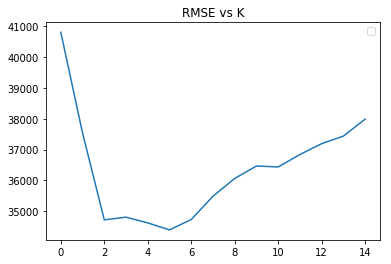

In [25]:
grafo_rmse = pd.DataFrame(valor_rmse)
grafo_rmse.plot()
plt.title("RMSE vs K")
plt.legend(())

A continuación se aplica una búsqueda exhaustiva para buscar optimizar los demás parámetros y verificar si obtenemos que el K óptimo es igual a 5 como nos indica el gráfico anterior

In [35]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'weights': ['uniform', 'distance'],
          'leaf_size':[1,2,3,5],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}

knn = neighbors.KNeighborsRegressor()

knn_model = GridSearchCV(knn, params, cv=5)
knn_model.fit(X_train,y_train)

print('Mejores Parámetros', knn_model.best_params_)

print('Mejor score:',knn_model.best_score_)



Mejores Parámetros {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 3, 'weights': 'distance'}
Mejor score: 0.947967391222243


# Informe final

Presentar un informe final con los datos inferidos del dataset utilizando herramientas gráficas y escritas teniendo en cuenta los destinatarios. En este caso colegas de la diplomatura para preparar el informe con un background adecuado al destinatario.